<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Deep%20Learning/from%20directory/Spot_the_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os 
os.environ['ZINDI_CONFIG_DIR'] = "/content/gdrive/My Drive/Zindi"

%cd /content/gdrive/My Drive/Zindi

/content/gdrive/My Drive/Zindi


In [ ]:
'''import requests
import requests, zipfile

#the url and auth_value from the website 
url = "https://api.zindi.africa/v1/competitions/zindiweekendz-learning-spot-the-mask-challenge/files/images.zip"
myobj = {'auth_token': "xQ1UFvv2GRNWc4CmZnvAcmmv"} #use your own

x = requests.post(url, data = myobj,stream=True)
target_path = '/content/gdrive/My Drive/Zindi/images.zip'

handle = open(target_path, "wb")
for chunk in x.iter_content(chunk_size=512):
  if chunk: # filter out keep-alive new chunks
    handle.write(chunk)
handle.close()'''

'import requests\nimport requests, zipfile\n\n#the url and auth_value from the website \nurl = "https://api.zindi.africa/v1/competitions/zindiweekendz-learning-spot-the-mask-challenge/files/images.zip"\nmyobj = {\'auth_token\': "xQ1UFvv2GRNWc4CmZnvAcmmv"} #use your own\n\nx = requests.post(url, data = myobj,stream=True)\ntarget_path = \'/content/gdrive/My Drive/Zindi/images.zip\'\n\nhandle = open(target_path, "wb")\nfor chunk in x.iter_content(chunk_size=512):\n  if chunk: # filter out keep-alive new chunks\n    handle.write(chunk)\nhandle.close()'

In [ ]:
#!unzip '/content/gdrive/My Drive/Zindi/images.zip'

In [ ]:
!ls

all_data    potholes_test.csv  test_ids_only.csv     train_labels.csv
images	    sample_sub_v2.csv  train		     Zebra.jfif
images.zip  Test	       train_ids_labels.csv


In [ ]:
#We are going to use flow from dataframe
#Since the ids in the train csv has image extension no need to create a function to add jpg
#Training sample is small, going to use image Data augmentation 

In [ ]:
#import necssary libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [ ]:
#location of train and test csv
traindf = pd.read_csv('/content/gdrive/My Drive/Zindi/train_labels.csv',dtype=str)
train_dir = '/content/gdrive/My Drive/Zindi/images'

In [ ]:
datagen = dict(rescale = 1./255, validation_split = 0.3)

In [ ]:
train_datagen = ImageDataGenerator(**datagen, horizontal_flip=True)
valid_datagen = ImageDataGenerator(**datagen)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = train_dir,
    x_col = 'image',
    y_col = 'target',
    shuffle = True,
    subset="training",
    seed = 42,
    target_size = (150,150)

)

Found 916 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = train_dir,
    x_col = 'image',
    y_col = 'target',
    shuffle = True,
    subset="validation",
    seed = 42,
    target_size = (150,150)
)

Found 392 validated image filenames belonging to 2 classes.


In [ ]:
import numpy as np
dataset_labels = sorted(train_generator.class_indices.items(), key = lambda pair:pair[1])

dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['0' '1']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    Conv2D(32, 3, padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.01),  kernel_initializer='he_uniform', activation='relu', input_shape = [150,150,3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128,kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer='he_uniform', activation= 'relu'),
                    Dense(2, activation= 'softmax')
])

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
step = np.ceil(train_generator.samples/train_generator.batch_size)
valid_step = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(train_generator, steps_per_epoch=step, callbacks = [early_stopping_cb],epochs=50, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/50
29/29 [==============================] - 14s 486ms/step - loss: 10.7209 - accuracy: 0.4956 - val_loss: 8.5933 - val_accuracy: 0.5102
Epoch 2/50
29/29 [==============================] - 13s 459ms/step - loss: 7.3910 - accuracy: 0.5764 - val_loss: 6.3183 - val_accuracy: 0.5408
Epoch 3/50
29/29 [==============================] - 13s 452ms/step - loss: 5.6003 - accuracy: 0.6081 - val_loss: 4.9351 - val_accuracy: 0.6556
Epoch 4/50
29/29 [==============================] - 14s 484ms/step - loss: 4.4777 - accuracy: 0.6736 - val_loss: 4.0357 - val_accuracy: 0.7347
Epoch 5/50
29/29 [==============================] - 13s 457ms/step - loss: 3.7417 - accuracy: 0.7140 - val_loss: 3.4755 - val_accuracy: 0.7066
Epoch 6/50
29/29 [==============================] - 13s 463ms/step - loss: 3.2552 - accuracy: 0.6954 - val_loss: 3.0122 - val_accuracy: 0.7551
Epoch 7/50
29/29 [==============================] - 13s 451ms/step - loss: 2.8543 - accuracy: 0.7434 - val_loss: 2.7078 - val_accuracy: 0.750

(0.0, 9.0)

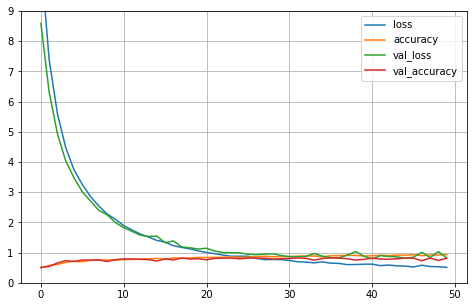

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,9)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
testdf = pd.read_csv('/content/gdrive/My Drive/Zindi/sample_sub_v2.csv',dtype=str)

In [ ]:
test_generator = test_datagen.flow_from_dataframe( 
    dataframe = testdf,
    directory = train_dir,
    x_col = "image",
    y_col = None,
    shuffle = False,
    class_mode=None,
    batch_size=1,
    target_size = (150,150),
)

Found 509 validated image filenames.


In [ ]:
test_steps = np.ceil(test_generator.samples/test_generator.batch_size)
pred = model.predict_generator(test_generator, steps = test_steps)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
acc

0.0

In [ ]:
pred

array([[0.5776503 , 0.42234963],
       [0.52780396, 0.472196  ],
       [0.31040987, 0.6895901 ],
       ...,
       [0.9897002 , 0.01029978],
       [0.12111753, 0.87888247],
       [0.45768368, 0.5423163 ]], dtype=float32)

In [ ]:
pred.max(1)

array([0.5776503 , 0.52780396, 0.6895901 , 0.9173115 , 0.7395506 ,
       0.9801682 , 0.982746  , 0.9414758 , 0.9959318 , 0.5680111 ,
       0.9980281 , 0.9383794 , 0.99927634, 0.9993887 , 0.5392742 ,
       0.9839401 , 0.72624063, 0.996005  , 0.9167277 , 0.7053851 ,
       0.9569443 , 0.986406  , 0.609173  , 0.9795511 , 0.9976113 ,
       0.94576645, 0.64137286, 0.63432086, 0.9553517 , 0.9968264 ,
       0.9354201 , 0.9929651 , 0.997971  , 0.82198745, 0.7742128 ,
       0.9448147 , 0.9180175 , 0.91186064, 0.99263024, 0.575458  ,
       0.58640903, 0.9809048 , 0.78304774, 0.9705246 , 0.9668646 ,
       0.98133355, 0.51582676, 0.8245529 , 0.7140953 , 0.7997981 ,
       0.9898051 , 0.76130646, 0.5846556 , 0.8956845 , 0.998437  ,
       0.9973246 , 0.93474615, 0.9997348 , 0.99623495, 0.99895597,
       0.97829926, 0.90919024, 0.9065878 , 0.84726036, 0.73161894,
       0.9299183 , 0.94094473, 0.8068187 , 0.97099686, 0.9831088 ,
       0.97848606, 0.9246003 , 0.9870809 , 0.95769584, 0.99740

In [ ]:
sample = pd.read_csv('/content/gdrive/My Drive/Zindi/sample_sub_v2.csv')

In [ ]:
sample['target'] = pred.max(1)

In [ ]:
sample.head()

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0.577650
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0.527804
2,aclkjfvackiieiznzfcwienplielrj.jpg,0.689590
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0.917311
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0.739551


In [ ]:
sample.to_csv('/content/gdrive/My Drive/Zindi/mask_test1.csv', header=True, index=False)

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
 include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(2, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)


In [ ]:
for layer in base_model.layers:
 layer.trainable = False

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
step = np.ceil(train_generator.samples/train_generator.batch_size)
valid_step = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(train_generator, steps_per_epoch=step, callbacks = [early_stopping_cb],epochs=20, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/20
29/29 [==============================] - 15s 524ms/step - loss: 0.4794 - accuracy: 0.7478 - val_loss: 0.3137 - val_accuracy: 0.8648
Epoch 2/20
29/29 [==============================] - 14s 497ms/step - loss: 0.2745 - accuracy: 0.8723 - val_loss: 0.3046 - val_accuracy: 0.8571
Epoch 3/20
29/29 [==============================] - 14s 496ms/step - loss: 0.2556 - accuracy: 0.8865 - val_loss: 0.3008 - val_accuracy: 0.8622
Epoch 4/20
29/29 [==============================] - 14s 486ms/step - loss: 0.2186 - accuracy: 0.9116 - val_loss: 0.3120 - val_accuracy: 0.8724
Epoch 5/20
29/29 [==============================] - 14s 482ms/step - loss: 0.2028 - accuracy: 0.9279 - val_loss: 0.3025 - val_accuracy: 0.8673
Epoch 6/20
29/29 [==============================] - 14s 483ms/step - loss: 0.2014 - accuracy: 0.9083 - val_loss: 0.3246 - val_accuracy: 0.8622
Epoch 7/20
29/29 [==============================] - 14s 489ms/step - loss: 0.1807 - accuracy: 0.9356 - val_loss: 0.3075 - val_accuracy: 0.8571

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
for layer in base_model.layers:
 layer.trainable = True

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
step = np.ceil(train_generator.samples/train_generator.batch_size)
valid_step = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(train_generator, steps_per_epoch=step, callbacks = [early_stopping_cb],epochs=50, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/50
29/29 [==============================] - 16s 559ms/step - loss: 0.0244 - accuracy: 0.9891 - val_loss: 0.2377 - val_accuracy: 0.9362
Epoch 2/50
29/29 [==============================] - 16s 536ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.2166 - val_accuracy: 0.9286
Epoch 3/50
29/29 [==============================] - 16s 548ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.2039 - val_accuracy: 0.9388
Epoch 4/50
29/29 [==============================] - 16s 539ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.2022 - val_accuracy: 0.9439
Epoch 5/50
29/29 [==============================] - 16s 540ms/step - loss: 0.0264 - accuracy: 0.9956 - val_loss: 0.1976 - val_accuracy: 0.9464
Epoch 6/50
29/29 [==============================] - 16s 541ms/step - loss: 0.0097 - accuracy: 0.9978 - val_loss: 0.1955 - val_accuracy: 0.9464
Epoch 7/50
29/29 [==============================] - 16s 553ms/step - loss: 0.0161 - accuracy: 0.9934 - val_loss: 0.1937 - val_accuracy: 0.9490

In [ ]:
test_steps = np.ceil(test_generator.samples/test_generator.batch_size)
pred = model.predict_generator(test_generator, steps = test_steps)

In [ ]:
pred

array([[0.25219986, 0.7478001 ],
       [0.9332365 , 0.06676348],
       [0.00101137, 0.99898857],
       ...,
       [0.65591025, 0.3440898 ],
       [0.5267964 , 0.47320363],
       [0.9867113 , 0.01328875]], dtype=float32)

In [ ]:
sample = pd.read_csv('/content/gdrive/My Drive/Zindi/sample_sub_v2.csv')
sample['target'] = pred.max(1)

In [ ]:
sample.to_csv('/content/gdrive/My Drive/Zindi/mask_test2.1.csv', header=True, index=False)

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
step = np.ceil(train_generator.samples/train_generator.batch_size)
valid_step = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(train_generator, steps_per_epoch=step,epochs=20, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/20
29/29 [==============================] - 13s 455ms/step - loss: 0.8235 - accuracy: 0.6550 - val_loss: 0.1234 - val_accuracy: 0.7526
Epoch 2/20
29/29 [==============================] - 12s 416ms/step - loss: 0.3698 - accuracy: 0.8308 - val_loss: 0.7761 - val_accuracy: 0.7832
Epoch 3/20
29/29 [==============================] - 12s 425ms/step - loss: 0.2957 - accuracy: 0.8701 - val_loss: 0.2292 - val_accuracy: 0.7908
Epoch 4/20
29/29 [==============================] - 12s 420ms/step - loss: 0.2208 - accuracy: 0.9159 - val_loss: 1.0267 - val_accuracy: 0.8444
Epoch 5/20
29/29 [==============================] - 12s 415ms/step - loss: 0.1982 - accuracy: 0.9214 - val_loss: 0.2341 - val_accuracy: 0.8214
Epoch 6/20
29/29 [==============================] - 12s 418ms/step - loss: 0.1485 - accuracy: 0.9607 - val_loss: 0.3399 - val_accuracy: 0.8189
Epoch 7/20
29/29 [==============================] - 12s 418ms/step - loss: 0.1012 - accuracy: 0.9705 - val_loss: 0.6164 - val_accuracy: 0.7628

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
step = np.ceil(train_generator.samples/train_generator.batch_size)
valid_step = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(train_generator, steps_per_epoch=step, callbacks = [early_stopping_cb],epochs=30, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/50
29/29 [==============================] - 13s 458ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.4985 - val_accuracy: 0.8393
Epoch 2/50
29/29 [==============================] - 12s 410ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.8495
Epoch 3/50
29/29 [==============================] - 12s 413ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.5997 - val_accuracy: 0.8163
Epoch 4/50
29/29 [==============================] - 12s 419ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1387 - val_accuracy: 0.8444
Epoch 5/50
29/29 [==============================] - 12s 414ms/step - loss: 6.0793e-04 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 0.8342
Epoch 6/50
29/29 [==============================] - 12s 409ms/step - loss: 4.2759e-04 - accuracy: 1.0000 - val_loss: 1.3511 - val_accuracy: 0.8342
Epoch 7/50
29/29 [==============================] - 12s 414ms/step - loss: 4.4108e-04 - accuracy: 1.0000 - val_loss: 0.0144 - val_accu

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block4_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=step, callbacks = [early_stopping_cb],epochs=30, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/30
29/29 [==============================] - 14s 469ms/step - loss: 4.9407e-04 - accuracy: 1.0000 - val_loss: 0.7515 - val_accuracy: 0.8393
Epoch 2/30
29/29 [==============================] - 13s 432ms/step - loss: 1.3802e-04 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.8546
Epoch 3/30
29/29 [==============================] - 13s 431ms/step - loss: 1.2109e-04 - accuracy: 1.0000 - val_loss: 0.1539 - val_accuracy: 0.8189
Epoch 4/30
29/29 [==============================] - 12s 425ms/step - loss: 1.2570e-04 - accuracy: 1.0000 - val_loss: 0.2594 - val_accuracy: 0.8571
Epoch 5/30
29/29 [==============================] - 12s 424ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.7996 - val_accuracy: 0.8418
Epoch 6/30
29/29 [==============================] - 12s 430ms/step - loss: 0.0657 - accuracy: 0.9760 - val_loss: 1.3755 - val_accuracy: 0.8316
Epoch 7/30
29/29 [==============================] - 12s 429ms/step - loss: 0.0232 - accuracy: 0.9913 - val_loss: 0.0079 - val_

In [ ]:
for layer in conv_base.layers:
 layer.trainable = True

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=step, callbacks = [early_stopping_cb],epochs=30, validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/30
29/29 [==============================] - 16s 551ms/step - loss: 0.0048 - accuracy: 0.9978 - val_loss: 0.4327 - val_accuracy: 0.8597
Epoch 2/30
29/29 [==============================] - 14s 470ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.8673
Epoch 3/30
29/29 [==============================] - 14s 469ms/step - loss: 4.4871e-04 - accuracy: 1.0000 - val_loss: 0.3026 - val_accuracy: 0.8699
Epoch 4/30
29/29 [==============================] - 13s 465ms/step - loss: 1.2362e-04 - accuracy: 1.0000 - val_loss: 0.3443 - val_accuracy: 0.8776
Epoch 5/30
29/29 [==============================] - 14s 474ms/step - loss: 7.0748e-05 - accuracy: 1.0000 - val_loss: 0.8119 - val_accuracy: 0.8724
Epoch 6/30
29/29 [==============================] - 13s 465ms/step - loss: 3.2100e-05 - accuracy: 1.0000 - val_loss: 0.9382 - val_accuracy: 0.8724
Epoch 7/30
29/29 [==============================] - 14s 469ms/step - loss: 2.8222e-05 - accuracy: 1.0000 - val_loss: 0.0140 - 

In [ ]:
test_steps = np.ceil(test_generator.samples/test_generator.batch_size)
pred = model.predict_generator(test_generator, steps = test_steps)

In [ ]:
sample = pd.read_csv('/content/gdrive/My Drive/Zindi/sample_sub_v2.csv')
sample['target'] = pred.max(1)

In [ ]:
sample.to_csv('/content/gdrive/My Drive/Zindi/mask_test3.1.csv', header=True, index=False)